In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

from tensorflow import keras
import keras

In [2]:
# 케라스에서 mnist 데이터셋 적재하기
from tensorflow. keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [3]:
# 훈련데이터 살펴보기
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# 신경망 구조 2-2
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation= "relu"),
    layers.Dense(10, activation= "softmax")
])

In [9]:
# 컴파일 단계
model.compile(optimizer = "rmsprop",
             loss ="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [10]:
# 훈련을 시작하기 전에 데이트를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정
# 이미지 데이터 준비하기
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype("float32") / 255

In [11]:
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype("float32") / 255

In [12]:
# fit()메서드를 호출하여 훈련 데이터에 모델을 학습
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2532 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9887


In [13]:
# 모델을 사용하여 예측 만들기
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 68ms/step


array([8.7486995e-09, 1.3319362e-10, 7.8102715e-07, 3.4398596e-05,
       3.6592111e-11, 7.4310911e-08, 5.5942528e-14, 9.9996424e-01,
       7.9660893e-08, 2.1863011e-07], dtype=float32)

In [14]:
predictions[0].argmax()

7

In [15]:
predictions[0][7]

0.99996424

In [16]:
# 새로운 데이터에서 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9792
테스트 정확도: 0.979200005531311


## 신경망을 위한 데이터 표현

텐서(tensor): 다차원 넘파이 배열에 데이터를 저장하는 것-이전
- 데이터를 위한 컨테이너(데이터를 담아둠)
- 수치형 데이터를 많이 다룸(숫자)
- 텐서는 임의의 차원 개수를 가지는 행렬의 일반호된 모습
- 텐서에서는 차원(dimension)을 축(axis)라고 부름

- rank = 차원 = 축

--텐서: 다차원 배열/
--배열: np.array
- 1차원 배열: 벡터
- 2차원 배열: 행렬
- 3차원 배열: 텐서
-- 일반적으로 tensor는 np.array를 통해 다룬다

### 2.2.1 스칼라(랭크-0 텐서)
- 스칼라: 하나의 숫자만 담고 있는 텐서(스칼라텐서, 랭크-0텐서, 0D텐서)
- 넘파이에서 float32나 float64 타입의 숫자는 스칼라 텐서(배열 텐서)라고 함
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 알 수 있음
- 스칼라 텐서의 축 개수는 0개
- 텐서의 축 개수를 랭크라고 부름

In [22]:
import numpy as np
x= np.array(12)
print(x)
print(x.ndim)

12
0


## 2.2.2벡터(랭크-1텐서)
- 숫자의 배열을 벡터(vector), 랭크-1텐서, 1D텐서, 1차원 텐서
- 랭크-1텐서는 딱 하나의 축을 가짐

In [41]:
x = np.array([12,3,6,14,7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


In [42]:
# 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
# 주의 
# 5D 벡터: 하나의 축을 따라 5개의 차원을 가진 것
# 5D텐서: 5개의 축을 가진 것

## 2.2.3 행렬(랭크-2텐서)
- 벡터의 배열은 행렬, 랭크-2텐서, 2D텐서, 2차원 텐서
- 행렬에는 2개의 축이 있다. 행(row), 열(column)
- 행렬은 숫자가 채워진 사각 격자
- 첫번째 축: 행 [5, 78, 2, 34, 0]
- 두번째 축: 열 [5,6,7]

In [61]:
x = np.array([[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])

In [62]:
x.ndim

2

## 2.2.4 랭크-3 텐서와 더 높은 랭크의 텐서
- 이런 행렬을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석 가능
- 랭크-3텐서, 3D텐서, 3차원 텐서

In [59]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
              
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
              
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])

In [60]:
x.ndim

3

## 2.2.5 핵심속성
- 축의 개수(랭크): ndim속성에 저장됨
- 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 튜플
- 데이터 타입(dtype): float16, float32, float64,unit8, 텐서플로: string도 사용함

In [64]:
# MNIST예제
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_images) = mnist.load_data()

In [65]:
# ndim속성으로 축의 개수 확인
train_images.ndim

3

In [66]:
# 배열의 크기
train_images.shape

(60000, 28, 28)

In [67]:
# dtype으로 데이터타입 확인
train_images.dtype

dtype('uint8')

In [68]:
# => 배열은 8비트 정수형, 랭크-텐서, 28*28크기의 정수행렬이 6만개가 있는 배열임
# 각 행렬은 하나의 흑백 이미지, 행렬의 각 원소는 0~255사이의 값을 가짐

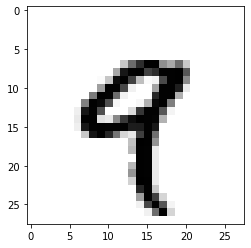

In [69]:
# 다섯번째 이미지 출력하기 2-8
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [71]:
train_labels[4]
# 레이블 정수는 9

9

## 2.2.6 넘파이로 텐서 조작하기
- 슬라이싱: 배열에 있는 특정 원소들을 선택

In [72]:
# 11번째에서 101번쨰까지(101번쨰는 포함X) 숫자를 선택하여(90,28,28)크기의 배열을 만든다
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [74]:
# 배열의 축읗 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice= train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


In [76]:
my_slice= train_images[:, 14:, 14:]
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [78]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

## 2.2.7 배치 데이터
- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축(인덱스가 0부터 시작하므로 0번째 축)은 샘플축(sample axis), 샘플차원(sample dimension)
- 딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않음
- 대신 데이터를 작은 배치(batch)로 나눔
- 첫번째 축(0번축)을 배치축 또는 배치차원

In [84]:
batch = train_images[:128]
batch= train_images[128:256]
n=3
batch = train_images[128 * n:128 *(n+1)]

## 2.2.8 텐서의 실제 사례
- 벡터 데이터(sample, features): 크기의 랭크-2텐서, 각 샘플은 수치 속성(특징(feature))으로 구성된 벡터
- 시계열 데이터 또는 시퀀스(sequence)데이터: (samples, timesteps, features)크기의 랭크-3텐서. 각 샘플은 특성 벡터의 (길이가 timesteps인)시퀀스
- 이미지: (sample, height, width, channel) 또는 (sample, channel, height, width) 크기의 랭크-4텐서. 각 샘플은 픽셀의 2D격자고, 각 픽셀은 수치값(채널(chanel))의 벡터
- 동영상: (sample, frame, height, width, channel) 또는 (sample, frame, channel, height, width) 크기의 랭크-5텐서. 각 샘플의 이미지의 (길이가 frames인)시퀀스

## 2.2.9 벡터 데이터
- 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치데이터는 랭크-2텐서로서 인코딩될 것이다.(즉 벡터의 배열)
- 첫번째 축: 샘플축
- 두번째 축: 특성축(feature axis)

## 2.2.10 시계열 데이터 또는 시퀀스 데이터
- 데이터에서 시간이(또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 랭크-3텐서로 저장됨
- 각 샘플은 벡터(랭크-2텐서)의 시퀀스로 인코딩되므로 배치 데이터는 랭크-3텐서로 인코딩 됨
- 주식가격 데이터셋, 트윗 데이터셋

## 2.2.11 이미지 데이터
- 이미지: 높이, 너비, 컬러 3차원
- 흑백 이미지: (장수, 높이, 너비, 1)=> 랭크-2텐서
- 컬러 이미지: (장수, 높이, 너비, 3)=> 랭크-3텐서

- 이미지 텐서를 지정하는 방식
- 채널 마지막방식: sample, height, width, color_depth 콜로 채널의 깊이를 끝에 놓는다.
- 채널 우선방식: sample, color_depth, height, width 컬러채널의 깊이를 배치 축 바로 뒤에

## 2.2.12 비디오 데이터
- 랭크-5텐서가 필요한 데이터
- 하나의 비디오는 프레임의 연속, 각 프레임은 하나의 컬러 이미지
- 프레임(height, width, color_depth)의 랭크-3텐서로 저장될 수 있기 때문에 
- 프레임의 연속은 (frames, height, width, color_depth)의 랭크-4텐서로 저장될 수 있다.
- 여러 비디오의 배치는(sample, frames, height, width, color_depth)의 랭크-5텐서로 저장될 수 있다.
- (s,f,h,w,c)

# 2.3 신경망의 톱니바퀴: 텐서연산
- 컴퓨터 프로그램을 이진수로 입력처리하는 몇개의 이항연산(AND OR, NOR등)
- 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서연산(텐서함수)으로 나타낼 수 있음

In [92]:
keras.layers.Dense(512, activation="relu")
# Dense 층을 쌓아 모델을 만듬
# 이 층은 행렬을 입력 받고 입력 텐서의 새로운 표현인 또 다른 행렬을 반환하는 함수
# w: 행렬, b: 벡터

### output = relu(dot(W, input)+b)
- W는 행렬이고, b는 벡터
- 둘 모두 층의 속성

### 3개의 텐서연산
- 입력 텐서와 텐서 W사이의 점곱(dot)
- 점곱으로 만들어진 행렬과 벡터 b사이의 덧셈(+)
- relus(렐루)연산, relu(x)는 max(x,0)

- int(1, x1, x2, x3,,)를 (Σ에 넣고, 시그모이드를 거쳐) 렐루함수를 거쳐서 out
- 1은 b(편향), x1(가중치), x2(가중치) -> (Σ | 시그모이드)=> 활성함수(렐루함수)
- 렐루함수: p. 152그림

## 2.3.1 원소별 연산
- relu함수와 덧셈: 원소별 덧셈(element-wise operation)
- 텐서에 있는 각 원소에 독립적으로 적용됨

In [23]:
# for 반복문
def naive_relu(x):
    assert len(x.shape) ==2
    x= x.copy()
    for i in range(x.shape[0]):
        x[i,j]=max(x[i,j],0)
    return x

In [24]:
# 덧셈
def navie_add(x,y):
    assert len(x.shape) ==2 
    assert s.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        x[i,j]+=y[i,j]
    return x

In [25]:
# 넘파이는 BLAS구현에 복잡한 일들을 위임함
#BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서조작 루틴, 전형적으로 포트란(Fortran)이나 C언어로 구현

In [26]:
# 원소별 연산
import numpy as np

# 원소별 덧셈
z = x+y
#원소별 렐루
z = np.maximum(z,0.)

In [27]:
# 시간차이 재보기
import time
x= np.random.random((20,100))
y= np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x+y
    z = np.maximum(z,0.)
print("걸린시간: {0:.2f} s". format(time.time() - t0))

걸린시간: 0.00 s


In [28]:
# 단순한 방법
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = navie_relu(z)
print("걸린시간:{0:.2f} s".format(time.time() - t0))

NameError: name 'naive_add' is not defined

# 2.3.2 브로드 캐스팅
- naive_add는 동일한 크기의 랭크-2텐서만 지원함
- 브로드캐스팅: 2단계
- 1. 큰 텐서의 ndim에 맞도록 작은 텐서에(브로드캐스팅 축이라고 부르는) 축이 추가됨
- 2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

In [29]:
import numpy as np

In [35]:
x=np.random.random((32,10))
y=np.random.random((10,))

In [40]:
# y에 비어있는 첫번쨰 축을 추가하여 크기를 (1, 10)으로 만듦
y = np.expand_dims(y,axis=0)
# y축을 32번 반복하면서 텐서 y의 크기는(32,10)이 됨
Y = np.concatenate([y] * 32, axis=0)

# 이렇게 하면 x,Y의 크기가 같아져서 더할 수 있게 됨

In [41]:
# 단순구현
def navie_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        x[i,j]+=y[j]
    return x

In [44]:
# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum연산을 적용
import numpy as np

x= np.random.random((64, 3, 32, 10))
y= np.random.random((32, 10))
z= np.maximum(x,y)

## 2.3.3 텐서 곱셈
- 텐서곱셈(tensor product), 점곱(dot product)
- 넘파이에서 텐서 곱셈은 np.dot함수를 사용하여 수행

In [50]:
x= np.random.random((32,))
y= np.random.random((32,))
z= np.dot(x,y)

z= x*y

In [53]:
# 2개의 벡터x와 y의 접곱
def navie_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z=0.
    for i in range(x.shape[0]):
        z+=x[i]*y[i]
    return z

# 두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능

In [55]:
# 행렬 x와 벡터 y사이에서도 점곱이 가능
def navie_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[1]):
        z[i] += x[i,j] * y[j]
    return z

In [59]:
def navie_matrix_vector_dot(x,y):
    z= np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = navie_vector_dot(x[i, :], y)
    return z

# 두 텐사 증 하나라도 ndim이 1보다 크면 dot연산에 교환법칙이 성립되지 않음
# dot(x,y)와 dot(y,x)가 같지 않다.
# x.shape[1]==y.shape[0]일 때 두 행렬 x와 y의 점곱(dot(x,y))이 성립됨
# x의 행과 y열 사이 벡터 점곱으로 인해 (x.shape[0], y.shape[1])크기의 행렬이 됨

In [60]:
def navie_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0], y.shape[1])
    for i in range(x.shape[1]):
        row_x = x[i, :]
        column_y = y[:, j]
        z[i,j] = naive_vector_dot(row_x, column_y)
    return z

In [ ]:
- 행렬의 접곱
# 크기를 맞추는 동일한 규칙을 따르면 고차원 텐서 간의 접곱을 할 수 있다
(a, b, c, d) · (d,) -> (a, b, c)
(a, b, c, d) · (d, e) -> (a, b, c, e)

# 2.3.4 텐서 크기 변환(tensor reshape)
- 모델에 주입할 숫자 데이터를 전처리할 때 사용
- train_images = train_images.reshape((60000, 28*28))
- 텐서의 크기를 변환하다는 것은 특정 크기에 맞게 열과 행을 재배열.
- 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일하다.

In [67]:
x= np.array(([0.,1.,],
             [2.,3.,],
             [4.,5.]))

In [69]:
x.shape

(3, 2)

In [72]:
x= x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [75]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [77]:
# 전치(transposition): 행렬의 전치는 행과 열을 바꾸는 것
# x[i, :] -> x[:,i]
x= np.zeros((300,20))
x= np.transpose(x)
x.shape

(20, 300)

# 2.3.5 텐서 연산의 기하학적 해석(analysis)
- 좌표 그림

In [79]:
A = [0.5, 1]
B = [1, 0.5]
두 벡터의 덧셈에 대한 기하학적 해석
텐서의 덧셈은 객체를 특정 방향으로 특정 양만큼(객체를 왜곡시키지 않고)이동
- 원래 A점에서 새로운 위치까지 거리와 방향은 벡터 B에 의해 결정됨

In [ ]:
기하학적 연산은 텐서로 표현할 수 있다.
- 이동(translation): (x,y)만큼 (수직,수평)이동
- 회전(rotaion): R= [cos(t)-sin(t)][sin(t) cos(t)] 。[x,y] 각도t만큼 2D벡터를 반시계방향 회전
- 크키변경(scaling): S= [[horizontal_factor, 0], [0, vectical_factor]]와 점곱하여 수직, 수평 방향으로 크기를 변경 = 대각행렬(diagona matrix) 
- 기울이기(skeing)
- 선형변환(linear transform):  크기변경, 회전
- 아핀변환(affine transform): 어떤 행렬과 점곱하여 얻는 선형변환과 (벡터를 더해 얻는) 이동조합 y=w*x+b, relu(W*x+b)
- relu활상화 함수를 사용하는 Dense층: 아핀 변환의 중요한 성질은 여러 아핀변환을 반복래서 적용해도 결국 하나의 아핀 변환이 됨

In [ ]:
## 2.3.6 딥러닝의 기하학적 해석
- 심층 신경망의 각 층은 데이터를 조금씩 풀어주는 변환을 적용하므로, 이런 층을 깊게 쌓으면 아주 복잡한 분해과정을 처리할 수 있음
- 15차원 문제를 1차원으로 하나하나 풀기(훨씬 정확)

# 2.4 신경망의 엔진: 그레이디언트 기반 최적화

In [ ]:
output = relu(dot(W, input)+b)
- 초기: 무작위 초기화
- 가중치가 점진적으로 조정
- 훈련

In [ ]:
1. 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출
2. x를 사용하여 모델을 실행하고(정방향 패스(forward pass)단계), 예측 y_pred를 구한다
3. y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모델의 손실을 구한다
4. 배체애 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트 한다
- 훈련 데이터에서 모델의 손실(예측 y_pred, 타깃 y_true)의 오차가 매우 작아질 것이다.

## 2.4.1 도함수란?

In [ ]:
- 연속적이고 매끄러운 함수 
f(x) = y
- 연속적인 함수에서는 x를 조금 바꾸면 y가 조금만 변경된다.
f(x + epsilon_x) = y + a * epsilon_x

## 2.4.2 텐서 연산의 도함수: 그레이디언트

In [ ]:
- 머신러닝 기반의 예
- 입력 벡터, x(데이터 셋에 있는 샘플)
- 행렬, w(모델 가중치)
- 타깃, y_true(모델이 x에 연관시키기 위해 학습해야 할 값)
- 손실함수, loss(현재의 예측과 y_true 간의 차이를 측정하기 위해 사용)

In [ ]:
# w를 사용하여 예측 y_pred를 계산하고 그 다음 예측 y_pred와 타깃 y_true사이의 손실 또는 차이를 계산함
y_prepd = dot(w,x)   # 모델 가중치 w를 사용하여 x에 대한 예측을 만든다
loss_value = loss(y_pred, y_true) # 예측이 얼마나 벗어났는지를 추정

In [ ]:
# 그레디언트를 사용하여 loss_value가 작아지도록 w를 업데이트 하는 방법
# 고정된 입력 x와 y_true가 있을 때 앞의 연산은 (모델 가중치) w값을 손실 값에 매핑하는 함수로 해석
loss_value =f(w)  # f는 w가 변화할 때 손실 값이 형성하는 곡선(또는 다차원 표면)을 설명

# 4장 신경망 시작하기: 분류와 회귀

## 4.1 영화 리뷰 분류: 이진 분류 문제

## 4.1.4 IMDB 데이터셋

In [1]:
# 4-1 IMDB데이터셋 로드
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
# num_words=1000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개 사용하겠다.
# 드물게 나타나는 단어는 무시
# 부정:0, 긍정:1

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# 가장 자주 등장하는 단어 1만개로 제한했기 때문에 단어인덱스는 9,999개를 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 4-2 리뷰를 다시 텍스트로 디코딩
word_index = imdb.get_word_index()
reverse_word_indx = dict(
    [(value, key) for (key, value) in word_index.items()])
decorded_review=  " ".join(
    [reverse_word_indx.get(i -3, "?") for i in train_data[0]])
# 0,1,2는 '패딩', '문서시작', '사전에 없음'

## 4.1.2 데이터 준비
- 신결망에 숫자를 바로 주입할 수 없음 숫자 리스트는 모두 길이가 다르지만 신경망은 동일한 크기의 배치를 기대하기 때문
- 리스트를 텐서로 바꾸는 두가지 방법
- 1. 같은 길이가 되도록 리스트 패딩을 추가, 크기의 정수 텐서로 변환, 그 다음 이 정수 텐서를 다룰 수 있는 층으로 신경망을 시작
- 2. 리스트를 멀티-핫인코딩 하여 0과1의 벡터로 변환.

In [7]:
## 4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 레이블을 벡터로 바꾸기
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 4.1.3 신경망 모델 만들기
- 입력 데이터가 벡터고 레이블은 스칼라(1 또는 0)
- 문제에 잘 작동하는 모델은 relu활성화 함수를 사용한 밀집 연결 층을 잘 쌓은 것임
- Dense 층 쌓을 때 중요한 두가지 
- 1. 얼마나 많은 층을 사용할 것인가?
- 2. 각 층에 얼마나 많은 유닛을 둘 것인가?

- 문제
- 16개의 유닛을 가진 2개의 중간 층
- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층

In [10]:
# 4-4 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units = 16, activation = "relu"),
    layers.Dense(units = 16, activation = "relu"),
    layers.Dense(units = 1, activation = "sigmoid"),
])

# Dense층에 전달한 첫번째 매개변수는 층의 유닛개수이며, 층이 가진 표현 공간의 차원이다.

# 렐루함수 f(x)=h(x)
f(x) = x (x > 0)
     = x (x <= 0)
    
# 시그모이드 함수 
sigmoid(x) =1/(1+e)-x
e=2.7

# 활성화 함숙가 필요한 이유
relu와 같은 활성화 함수(비선형(non-linearity)함수)가 없다면 Dense층은 선형적안 연산인 점곱과 덧셈 2개로 구성
# output= relu(dot(w,input)+b)
그러므로 이 층은 입력에 대한 아핀만 학습할 수 있음

In [11]:
## 4-5모델 컴파일 하기
# rmsprop옵티마이저와 binary_crossentropy손실 함수로 모델을 설정
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])

In [12]:
## 4.1.4 훈련 검증

In [13]:
# 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 모델을 훈련시킴(훈련 데이터에 있는 모든 샘플에 대해 20번 반복)

In [14]:
# 훈련검증 4-6
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val= y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
# 4-7 모델 훈련하기
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 24ms/step - loss: 0.5416 - accuracy: 0.7723 - val_loss: 0.4058 - val_accuracy: 0.8624
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3242 - accuracy: 0.9004 - val_loss: 0.3322 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2367 - accuracy: 0.9263 - val_loss: 0.2844 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1860 - accuracy: 0.9404 - val_loss: 0.2778 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1488 - accuracy: 0.9540 - val_loss: 0.2869 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1212 - accuracy: 0.9613 - val_loss: 0.2996 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 0.3159 - val_accuracy: 0.8806
Epoch 8/20
30

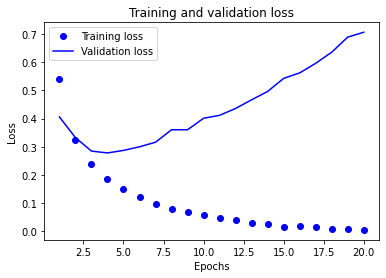

In [16]:
# 4-8 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

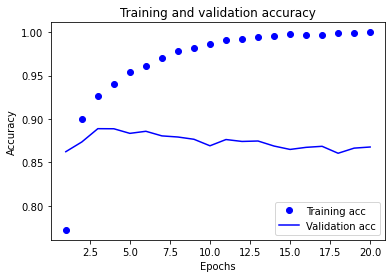

In [17]:
# 4-9 훈련과 검증 정확도 그리기
plt.clf()  #그래프 초기화하기
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

In [18]:
# 4-10 모델 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4331 - accuracy: 0.8237
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2506 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1979 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2958 - accuracy: 0.8826


In [19]:
results

[0.29584598541259766, 0.8825600147247314]

In [20]:
## 4.1.5 훈련괸 모델로 새로운 모델 데이터에 대해 예측하기
model.predict(x_test)

782/782 [==============================] - 1s 1000us/step


array([[0.20196867],
       [0.9994243 ],
       [0.8910722 ],
       ...,
       [0.21816762],
       [0.07179138],
       [0.5320976 ]], dtype=float32)

In [24]:
# 4.1.6 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 16s 10ms/step - loss: 0.6431 - accuracy: 0.6452
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4160 - accuracy: 0.8829
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.9152
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2880 - accuracy: 0.8886


In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.19266908],
       [0.96382725],
       [0.93334514],
       ...,
       [0.14233485],
       [0.12644468],
       [0.43455926]], dtype=float32)

In [ ]:
--------------------------------------------------------------------

In [26]:
# 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "mse",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.2084 - accuracy: 0.0033
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1372 - accuracy: 0.0040
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0899 - accuracy: 0.0226
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.0534


In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 1ms/step


array([[0.22478239, 0.14848131, 0.08719953, ..., 0.14023608, 0.06072513,
        0.17325895],
       [0.9116101 , 0.99360913, 0.99857485, ..., 0.990042  , 0.99932617,
        0.99649036],
       [0.758169  , 0.8832995 , 0.93231785, ..., 0.8549452 , 0.9698972 ,
        0.93586284],
       ...,
       [0.22255367, 0.16054395, 0.09698723, ..., 0.1482987 , 0.05990888,
        0.16157305],
       [0.15589958, 0.08325098, 0.04398393, ..., 0.08272775, 0.02826785,
        0.1128445 ],
       [0.47498542, 0.52096033, 0.46370107, ..., 0.4603784 , 0.5183181 ,
        0.590542  ]], dtype=float32)

In [28]:
# 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 8ms/step - loss: 0.4221 - accuracy: 0.8304
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2403 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1798 - accuracy: 0.9349
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3170 - accuracy: 0.8788


In [29]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.09335426],
       [0.9971033 ],
       [0.85677177],
       ...,
       [0.21504785],
       [0.03518954],
       [0.67698246]], dtype=float32)

# 4.2 뉴스기사분류: 다중 분류 문제
- 다중 분류(multiclass classification)
- 단일 레이블 다중 분류(single-label, multiclass classification)
- 다중 레이블 다중 분류(multi-label, multiclass classification)

In [30]:
##  4.2.1 로이터 데이터셋
# 코드 4-11 로이터 데이터셋 로드하기
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 매개변수 데이터는 자주 등장하는 10000개로 제한

In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
# 정수 리스트(단어 인덱스)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [34]:
# 코드 4-12 로이터 데이터 셋을 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [35]:
train_labels[0]

3

In [36]:
## 4.2.2 데이터 준비
# 데이터를 벡터로 변환
# 코드 4-13 데이터 인코딩하기
x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

In [ ]:
# 레이블을 벡터로 바꾸는 방법2
- 1. 레이블 리스트를 정수 텐서로 변환
- 2. 원-핫 인코딩
- 원-핫인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터

In [38]:
# 코드 4-14 레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels) 

In [39]:
# 케라스 내장함수
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [40]:
## 4.2.3 모델 구성
# 코드 4-15 모델 정의
model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [ ]:
# 주의
- 마지막 Dense층의 크기가 46: 각 입력 샘플에 대해 46차원의 벡터를 출력한다. 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩 된 것
- 마지막 층에 softmax활성화 함수가 사용. 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률. 46개의 값을 모두 더하면 1이 됨

In [ ]:
# categorical_crossentropy(손실함수)는 두 확률 분포 사이의 거리를 측정한다.
모델이 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리
두 분포 사시의 거리를 최소화 함으로써 진짜 레이블에 가까운 출력물을 내도록 훈련한다.

In [41]:
# 코드 4-16 모델 컴파일 하기
model.compile(optimizer = "rmsprop",
             loss ="categorical_crossentropy",
             metrics=["accuracy"])

## 4.2.4 훈련 검증

In [42]:
## 코드 4-17 검증 세트 준비하기

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [44]:
# 코드 4-18 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 27ms/step - loss: 2.4799 - accuracy: 0.5362 - val_loss: 1.6487 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3743 - accuracy: 0.7061 - val_loss: 1.2951 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0357 - accuracy: 0.7774 - val_loss: 1.1209 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8167 - accuracy: 0.8240 - val_loss: 1.0246 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6441 - accuracy: 0.8682 - val_loss: 0.9642 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5124 - accuracy: 0.8961 - val_loss: 0.9504 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4112 - accuracy: 0.9187 - val_loss: 0.9036 - val_accuracy: 0.8180
Epoch 8/20
16

## 코드 4-19 훈련 검증 손실 그리기

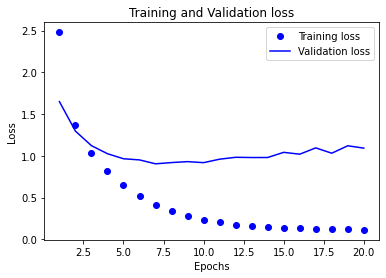

In [45]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 코드 4-20 훈련과 검증 정확도 그리기

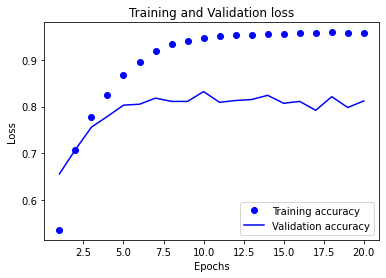

In [46]:
plt.clf()# 그래프 초기화
acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 4-21 모델을 처음부터 다시 훈련

In [47]:
model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(optimizer = "rmsprop",
             loss ="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.5560 - accuracy: 0.5194
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.3885 - accuracy: 0.7112
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0203 - accuracy: 0.7832
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7871 - accuracy: 0.8372
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6167 - accuracy: 0.8747
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4873 - accuracy: 0.8975
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3906 - accuracy: 0.9179
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3206 - accuracy: 0.9293
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9573 - accuracy: 0.7961


In [48]:
results 

[0.9573230147361755, 0.7960819005966187]

In [49]:
# 랜덤한 분류기를 사용해 예측
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.188780053428317

In [50]:
## 4.2.5 새로운 데이터에 대해 예측
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 1ms/step


(46,)

In [51]:
np.sum(predictions[0])

1.0

In [52]:
np.argmax(predictions[0])

3

## 4.2.6 레이블과 손실을 다루는 다른 방법

In [53]:
# 정수 텐서로 변환
y_train= np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])

## 4.2.7 충분히 큰 중간층을 두어야 하는 이유

In [54]:
# 병목이 나타남
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=46, activation='softmax'),
])
# 모델 컴파일 4-16
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics='accuracy')

history = model.fit(partial_x_train, partial_y_train,
          epochs=20, batch_size =128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.7640 - accuracy: 0.4245 - val_loss: 2.0304 - val_accuracy: 0.5580
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7282 - accuracy: 0.5896 - val_loss: 1.5903 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3700 - accuracy: 0.6569 - val_loss: 1.4278 - val_accuracy: 0.6530
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1625 - accuracy: 0.7040 - val_loss: 1.3553 - val_accuracy: 0.6680
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0093 - accuracy: 0.7331 - val_loss: 1.3115 - val_accuracy: 0.6770
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8897 - accuracy: 0.7825 - val_loss: 1.2868 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8024 - accuracy: 0.8058 - val_loss: 1.2941 - val_accuracy: 0.7180
Epoch 8/20
63/63 [=

# 4.3 주택 가격 예측: 회귀 문제

## 4.3.1 보스턴 주택 가격 데이터 셋

In [55]:
# 4-23 보스턴 주택 데이터 셋 로드
# 1. 데이터 준비
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [56]:
# 데이터 살펴보기
print(train_data.shape)
test_data.shape

(404, 13)


(102, 13)

In [57]:
# 402개의 훈련 샘플, 102개의 테스트 샘플이 있고, 13개의 수치 특성이 있다.
# 타깃은 주택의 중간 가격으로 천달러 단위임
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# 4.3.2 데이터 준비

In [58]:
# 특성별로 정규화 하는 것
# 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해 특성의 평균을 빼고 표준편차로 나눈다.
# 특성의 중앙이 0근처에 맞추어지고 표준편차가 1이 됨

In [59]:
# 4-2 데이터 정규화 하기
# 2. 데이터 처리(전처리)
mean= train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -=mean
test_data /= std

In [60]:
# 주의
# 절대로 테스트 데이터에 계산한 어떠한 값도 사용해서 안됨

## 4.3.3 모델 구성

In [61]:
# 3. 모델만들기(정의하기) 
import keras

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop", loss= "mse", metrics=["mae"])
    return model

## 4.3.4 K-겹 검증을 사용한 훈련 검증

In [62]:
# 4-26 K-겹 검증하기
import numpy as np
import keras


k= 4
num_val_samples =len(train_data)//k
num_epochs = 100
all_scores=[]
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i+1)* num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1)* num_val_samples]
    partia_train_data = np.concatenate(
    [train_data[:i* num_val_samples],
     train_data[(i + 1)*num_val_samples:]],
        axis=0)
    partia_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
model.fit(partia_train_data, partia_train_targets,
         epochs = num_epochs, batch_size=16, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [63]:
# num_epochs=100으로 실행
all_scores

[2.3470988273620605]

In [64]:
np.mean(all_scores)

2.3470988273620605

In [65]:
# 4-27 각 폴드의 검중 점수 저장하기
num_epochs =500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i* num_val_samples: (i+1)*num_val_samples]
    partia_train_data= np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
partia_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
history = model.fit(partia_train_data, partia_train_targets,
                   validation_data=(val_data, val_targets),
                   epochs=num_epochs, batch_size=16, verbose=0)
mae_histoy = history.history['val_mae']
all_mae_histories.append(mae_histoy)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [187]:
mae_history = history.history['val_mae']
print(mae_history[:10])
    
all_mae_histories.append(mae_history)
print(all_mae_histories[:3])

[21.251785278320312, 17.952741622924805, 13.450610160827637, 8.934240341186523, 6.457298278808594, 5.276968955993652, 4.506893634796143, 4.197632789611816, 3.8989779949188232, 3.681535005569458]
[[17.208391189575195, 13.68774700164795, 9.505520820617676, 5.863607883453369, 4.744641304016113, 4.156180381774902, 3.705875873565674, 3.360576629638672, 3.250675916671753, 2.9229626655578613, 2.9160819053649902, 2.902553081512451, 2.802931308746338, 2.6277859210968018, 2.514071226119995, 2.505136489868164, 2.33263897895813, 2.305694818496704, 2.1962380409240723, 2.2477657794952393, 2.15116024017334, 2.458343505859375, 2.065349578857422, 2.011779308319092, 2.1303935050964355, 1.9415124654769897, 1.9363327026367188, 1.9260127544403076, 1.884361982345581, 1.986196517944336, 1.9698623418807983, 1.9495885372161865, 1.8983482122421265, 1.8757059574127197, 2.0055971145629883, 2.026499032974243, 1.8379371166229248, 1.8265125751495361, 1.8375465869903564, 1.847381830215454, 1.8221992254257202, 1.79924

In [66]:
# 4-28 k-겹 검증 점수 평균 기록
average_mae_history=[
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

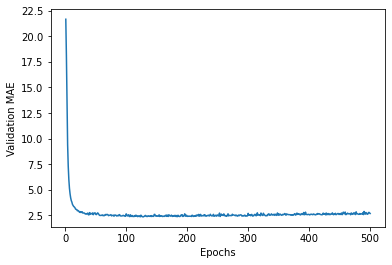

In [67]:
# 4-29 검증 점수 그래프 그리기
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

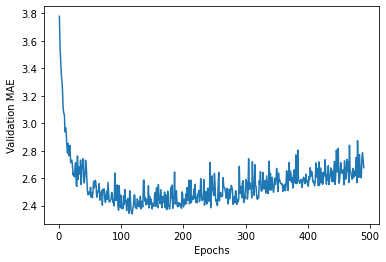

In [68]:
# 나머지 곡선 부분과 스케일이 크게 다른 처음 10개의 데이터 포인트 제외 시키기
# 4-30 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [69]:
# 140번째 에포크 이후에 줄어드는 것이 멈춤. 이 지점 이후로는 과대적합이 시작됨

In [70]:
# 4-31 최종 모델 훈련하기
model = build_model()
model.fit(train_data, train_targets,
         epochs= 130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 13.4363 - mae: 2.5128


In [71]:
test_mae_score

2.5128090381622314

# 11.24 p.172~178

all_mae_histories[0][0]
all_mae_histories[1][0]
all_mae_histories[2][0]
all_mae_histories[3][0]
all_mae_histories[4][0]

all_mae_histories[0][1]
all_mae_histories[1][1]
all_mae_histories[2][1]
all_mae_histories[3][1]
all_mae_histories[4][1]

all_mae_histories[0][2]
all_mae_histories[1][2]
all_mae_histories[2][2]
all_mae_histories[3][2]
all_mae_histories[4][2]

In [170]:
# 방법1
a_m_h = []
for i in range(num_epochs):
    each_epoch = []
    for x in all_mae_histories:
        each_epoch.append(x[i])
    a_m_h.append(np.mean(each_epoch)) 
print(mae_history)

[21.251785278320312, 17.952741622924805, 13.450610160827637, 8.934240341186523, 6.457298278808594, 5.276968955993652, 4.506893634796143, 4.197632789611816, 3.8989779949188232, 3.681535005569458, 3.5456976890563965, 3.384284257888794, 3.2831192016601562, 3.1660523414611816, 3.1767077445983887, 3.147764205932617, 2.9752626419067383, 2.942695140838623, 2.8524012565612793, 2.8611092567443848, 2.9858574867248535, 2.8838586807250977, 2.7284018993377686, 2.795139789581299, 2.7944087982177734, 2.839743137359619, 2.698698043823242, 2.7022316455841064, 2.6903305053710938, 2.755497455596924, 2.7379870414733887, 2.8805737495422363, 2.7204298973083496, 2.623520612716675, 2.7626218795776367, 2.8740596771240234, 2.6781322956085205, 2.72151517868042, 2.7244038581848145, 2.744626998901367, 2.6313834190368652, 2.6625304222106934, 2.7194926738739014, 2.6594223976135254, 2.6553401947021484, 2.6415421962738037, 2.660891056060791, 2.8110060691833496, 2.7115135192871094, 2.728978157043457, 2.716287612915039,

In [171]:
# 방법2
all_avg_mae=[]
for i in range(100):
    for mae_history in all_mae_histories:
        all_mae = []
        all_mae = mae_history[i]
        all_avg_mae.append(np.mean(all_mae))
        print(all_mae)

17.208391189575195
20.92072105407715
19.360095977783203
19.283939361572266
21.251785278320312
13.68774700164795
17.07221794128418
15.988276481628418
15.728100776672363
17.952741622924805
9.505520820617676
12.23686408996582
11.548440933227539
11.411537170410156
13.450610160827637
5.863607883453369
8.238418579101562
7.525996208190918
7.214821815490723
8.934240341186523
4.744641304016113
5.986262798309326
5.50496768951416
5.417281150817871
6.457298278808594
4.156180381774902
4.938127517700195
4.246429443359375
4.543072700500488
5.276968955993652
3.705875873565674
4.483839988708496
3.5427780151367188
3.9631569385528564
4.506893634796143
3.360576629638672
3.9760003089904785
3.2186503410339355
3.648258686065674
4.197632789611816
3.250675916671753
3.881664276123047
3.059584856033325
3.470313310623169
3.8989779949188232
2.9229626655578613
3.6494553089141846
2.9463775157928467
3.3942089080810547
3.681535005569458
2.9160819053649902
3.59788179397583
2.8235325813293457
3.1797385215759277
3.545697

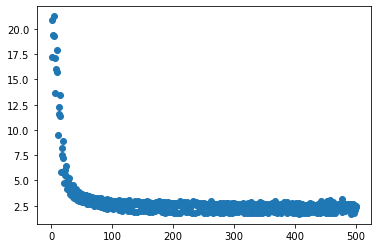

In [178]:
plt.scatter(range(1,501),all_avg_mae)

In [179]:
model = build_model()
model.fit(train_data, train_targets,
         epochs = 130,  batch_size=16, verbose=0)
test_mse_score, test_mae_score =model.evaluate(test_data, test_targets)

test_mae_score
# 값이 적을수록 좋은 것임

4/4 [==============================] - 0s 998us/step - loss: 17.0552 - mae: 2.8920


2.8919928073883057

train_x: data: 13개의 변수
test_y: target: 집값

In [181]:
model.predict(test_data)[0]

4/4 [==============================] - 0s 811us/step


array([9.963131], dtype=float32)

In [ ]:
--------------------------------------------------

# 5. 머신러닝의 기본요소

In [204]:
# 5-1 mnist에 백색 잡음 픽셀과 0픽셀 추가하기
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ =mnist.load_data()
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [208]:
# 5-2 백색 잡음과 0을추가한 mnist데이터에서 모델 훈련하기
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model=keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

model=get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model=get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 4s 8ms/step - loss: 0.2892 - accuracy: 0.9160 - val_loss: 0.1479 - val_accuracy: 0.9571
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1172 - accuracy: 0.9655 - val_loss: 0.1036 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.0852 - val_accuracy: 0.9749
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0551 - accuracy: 0.9845 - val_loss: 0.0946 - val_accuracy: 0.9733
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0823 - val_accuracy: 0.9760
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0312 - accuracy: 0.9906 - val_loss: 0.0783 - val_accuracy: 0.9789
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0235 - accuracy: 0.9934 - val_loss: 0.0825 - val_accuracy: 0.9797
Epoch 

NameError: name 'train_images_with_zeros_channels' is not defined

In [ ]:
# 5-3 검증 정확도 비교 그래프 그리기
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs= range(1,11)
plt.plot(epochs, val_acc_noise, "b-",
        label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()